In [137]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [12, 8]

In [138]:
# Generated signal parameters
t_end = 8 # s
f_s = 1000000 # Hz

#f_c = 172000000 # Hz
f_c = 173500000 # Hz

#f_t = 5000 # Hz offset from center
#f_t = 200000
f_t = 173200000

t_ping = 0.05 # s
ping_period = 1 # s
ping_power = -25# dB
noise_power = -60 # dB
#noise_power = -30 # dB

In [139]:
# Computed signal parameters
ping_amplitude = 10 ** (ping_power / 20) # FS
ping_length = int(t_ping * f_s) # samples
ping_time_index = np.arange(0, ping_length)
ping_signal = np.cos(f_t / 2 * np.pi* ping_time_index) + 1j * np.sin(f_t / 2 * np.pi* ping_time_index)

ping_period_samples = ping_period * f_s
noise_snr = 10.0**(noise_power/10.0)
#ping_wait_signal = np.random.normal(0, np.sqrt(noise_snr*2.0)/2.0, size=(int((ping_period - t_ping) * f_s), 2)).view(np.complex) # Generate noise with calculated power
#ping_signal_noise = ping_amplitude * ping_signal + np.random.normal(0, np.sqrt(noise_snr*2.0)/2.0, size=(len(ping_signal), 2)).view(np.complex).reshape(len(ping_signal)) # Generate noise with calculated power
ping_wait_signal = np.random.normal(0, np.sqrt(noise_snr*2.0)/2.0, size=(int((ping_period - t_ping) * f_s), 2)).view(complex) # Generate noise with calculated power
ping_signal_noise = ping_amplitude * ping_signal + np.random.normal(0, np.sqrt(noise_snr*2.0)/2.0, size=(len(ping_signal), 2)).view(complex).reshape(len(ping_signal)) # Generate noise with calculated power
#ping_signal_noise = ping_amplitude * ping_signal


In [140]:

#ping_signal = np.cos(f_t / 2 * np.pi* ping_time_index) + 1j * np.sin(f_t / 2 * np.pi* ping_time_index)
ping_signal = np.cos(f_t * np.pi* ping_time_index) + 1j * np.sin(f_t * np.pi* ping_time_index)
ping_signal = ping_signal*ping_amplitude

signal = np.random.normal(0, np.sqrt(noise_snr*2.0)/2.0, size=(t_end * f_s, 2)).view(complex)
for i in range(1,int(t_end / ping_period)+1):
    for j in range(len(signal[((i*f_s)-len(ping_signal)):(i*f_s)] )):
        signal[(i*f_s)-len(ping_signal)+j] = signal[(i*f_s)-len(ping_signal)+j] + ping_signal[j]

f_t = 273200000
#ping_signal2 = np.cos(f_t / 2 * np.pi* ping_time_index) + 1j * np.sin(f_t / 2 * np.pi* ping_time_index)
ping_signal2 = np.cos(f_t * np.pi* ping_time_index) + 1j * np.sin(f_t * np.pi* ping_time_index)
ping_signal2 = ping_signal2*ping_amplitude
for i in range(1,int(t_end / ping_period)):
    for j in range(len(signal[((i*f_s)-len(ping_signal))+250000:(i*f_s)+250000] )):
        signal[(i*f_s)-len(ping_signal2)+j+250000] = signal[(i*f_s)-len(ping_signal2)+j+250000] + ping_signal2[j]
        

Text(0, 0.5, 'Received Power (dB)')

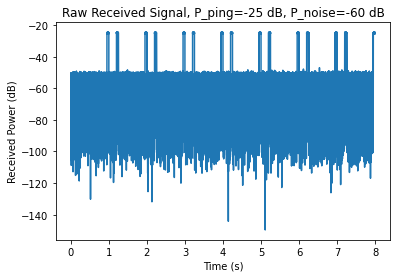

In [141]:
%matplotlib inline 
signal_magnitude = np.abs(signal)
signal_power = 20 * np.log10(signal_magnitude)
t = np.arange(len(signal_power)) / f_s
plt.plot(t, signal_power)
plt.title("Raw Received Signal, P_ping=%d dB, P_noise=%d dB" % (ping_power, noise_power))
plt.xlabel("Time (s)")
plt.ylabel("Received Power (dB)")
# plt.savefig("raw_signal.png")

<IPython.core.display.Javascript object>


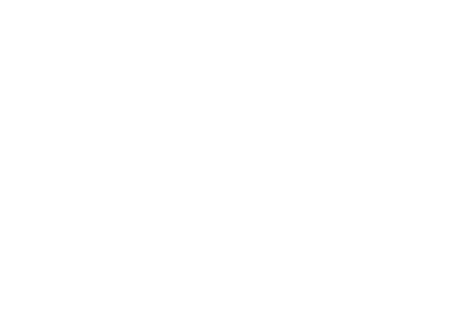

In [142]:
%matplotlib notebook
plt.plot(np.imag(signal))
plt.plot(np.real(signal))

In [143]:
plt.plot(t, np.real(signal), label='Re')
plt.plot(t, np.imag(signal), label='Im')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (normalized)')
#plt.title('Time Series Plot of %s' % (dataFilePath))
plt.title('Time Series Plot')
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


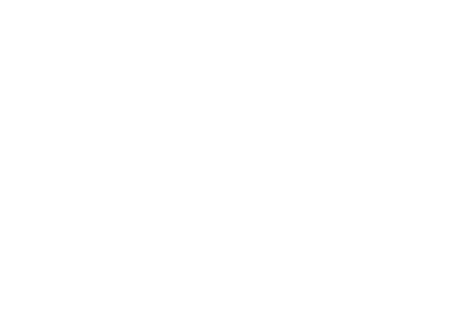

Text(0.5, 1.0, 'Time Series Plot of the Snippet containing the ping')

In [144]:
%matplotlib notebook
plt.plot(np.imag(ping_signal_noise))
plt.plot(np.real(ping_signal_noise))
#plt.plot(np.real(ping_signal))
#plt.xlim(20000, 20010)
plt.title('Time Series Plot of the Snippet containing the ping')

In [145]:
#samplingFrequency = 1.5e6
#centerFrequency = 173.5e6

samplingFrequency = f_s
centerFrequency = f_c

In [146]:
#nFFTs = 2048 # The original one we had
#nFFTs = 4096
nFFTs = 8192
#nFFTs = 262144

if signal.shape[0]%nFFTs != 0:
    signal = signal[signal.shape[0]%nFFTs:] 
    # Occurs so that our data is divisible by nFFTs, otherwise it breaks
    
fft_in = np.reshape(signal, (int(len(signal) / nFFTs), nFFTs))
fft_out = np.fft.fftshift(np.fft.fft(fft_in, norm=None))
fft_freqs = np.fft.fftshift(np.fft.fftfreq(nFFTs, 1/samplingFrequency))
fft_times = np.arange(0, len(signal) / samplingFrequency, nFFTs/samplingFrequency)
spectralPower = np.abs(20 * np.log10(fft_out)) # Calculates PSD

<IPython.core.display.Javascript object>


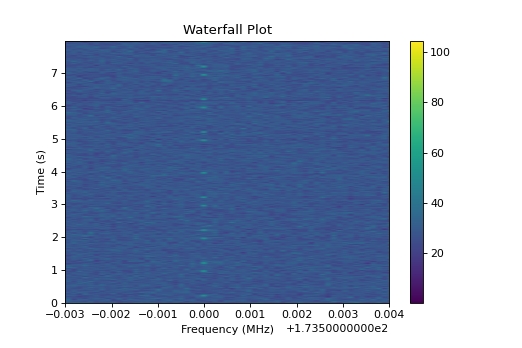

In [154]:
%matplotlib notebook
plt.imshow(spectralPower, origin='lower', extent=((fft_freqs[0] + centerFrequency) / 1e6, (fft_freqs[-1] + centerFrequency) / 1e6, fft_times[0], fft_times[-1]), aspect='auto')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Time (s)')
#plt.xlim(173.96, 173.967)
#plt.xlim(173.495, 173.51)
plt.xlim(173.497, 173.504)
#plt.xlim(173.5, 173.58)
#plt.ylim(4, 10)
plt.title('Waterfall Plot')
plt.colorbar()

In [148]:
import datetime # Used to test how fast code runs
from scipy.stats import kurtosis, skew
import random 

In [149]:
skew_freqs = []
for i in range(spectralPower.shape[1]): 
    skew_freqs.append(skew(spectralPower[:,i]))

found_ping = np.argmax(skew_freqs)
our_freq = (fft_freqs[found_ping] + centerFrequency) / 1e6
print('Our ping frequency is: {}'.format(our_freq))

Our ping frequency is: 173.71240234375


Text(0.5, 1.0, 'Plot with nFFTs = 8192')

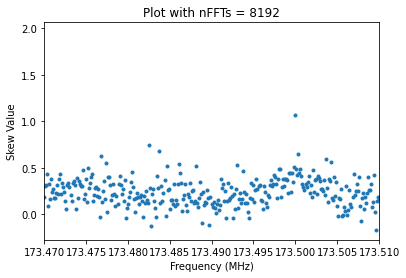

In [150]:
actual_freqs = (fft_freqs + centerFrequency) / 1e6
%matplotlib inline
plt.plot(actual_freqs,skew_freqs,'.')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Skew Value')
#plt.xlim(173.96, 173.967)
#plt.xlim(173.964, 173.965)
#plt.xlim(173.9642, 173.9646)
plt.xlim(173.47, 173.51)
#plt.xlim(173.56, 173.58)
#plt.ylim(4, 10)
plt.title('Plot with nFFTs = {}'.format(nFFTs))

Skew of 173.7124 MHz: 1.956
Skew of 173.5000 MHz: 0.475


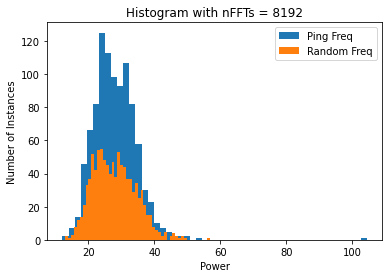

In [151]:
%matplotlib inline
count, bins, ignored = plt.hist(spectralPower[:,found_ping], 50, density=False,label='Ping Freq')
plt.xlabel('Power')
plt.ylabel('Number of Instances')
plt.title('Histogram with nFFTs = {}'.format(nFFTs))
print('Skew of {:.4f} MHz: {:.3f}'.format(our_freq,skew_freqs[found_ping]))

#random_freq = random.randint(0,len(skew_freqs)) 
random_freq = random.randint(found_ping-5,found_ping+5) 
#random_freq = []
count, bins, ignored = plt.hist(spectralPower[:,random_freq], 50, density=False,label='Random Freq')
plt.legend(loc='upper right')
#print('Skew of {:.4f} MHz: {:.3f}'.format((fft_freqs[random_freq] + centerFrequency) / 1e6,skew_freqs[random_freq]))
print('Skew of {:.4f} MHz: {:.3f}'.format((fft_freqs[4096] + centerFrequency) / 1e6,skew_freqs[random_freq]))

In [152]:
kurtosis_freqs = []
for i in range(spectralPower.shape[1]): 
    kurtosis_freqs.append(kurtosis(spectralPower[:,i]))

found_ping = np.argmax(kurtosis_freqs)
our_freq = (fft_freqs[found_ping] + centerFrequency) / 1e6
print('Our ping frequency is: {}'.format(our_freq))

Our ping frequency is: 173.71240234375


Text(0.5, 1.0, 'Plot with nFFTs = 8192')

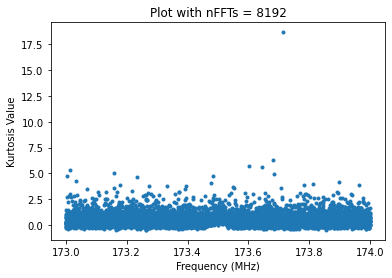

In [153]:
%matplotlib inline
plt.plot(actual_freqs,kurtosis_freqs,'.')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Kurtosis Value')
#plt.xlim(173.96, 173.967)
#plt.xlim(173.964, 173.965)
#plt.xlim(173.9642, 173.9646)
#plt.ylim(4, 10)
plt.title('Plot with nFFTs = {}'.format(nFFTs))